# **Notas**
## **Alunos:**
    **Leydson Barros**    
    **Leandro Damaceno**


---



> https://medium.com/data-hackers/uma-introdu%C3%A7%C3%A3o-simples-ao-pandas-1e15eea37fa1



# --**Brazilian Cities**--


1.   Classificação: Ouro
2.   Usabilidade: 10





> https://www.kaggle.com/datasets/crisparada/brazilian-cities


# --**Importações bibliotecas**-- 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# **Base de dados** 

In [2]:

df_brazil=pd.read_csv("datas\BRAZIL_CITIES_REV2022.CSV",sep=",")
df_dictionary=pd.read_csv("datas\Data_Dictionary.csv",sep=";")

# ***Especificação***
## 1. **Coletar	dados ok**
## 2.	**Realizar pré-processamento	dos	dados**	


*   Definição	de	tipos
*   Tratamento	de	dados	ausentes
*   Normalização	e	discretização
*   Limpeza	de	dados	(univariado,	bivariado	e	
multivariado)
## 3.	**Apresentar estatísticas descritivas	dos	dados com	visualizações** 
## 4.	**Realizar teste	de	hipóteses para comparação de	valores	de	categorias	(ex.	preço	m2 em diferentes bairros)	e	visualizar diferenças**


# **Bônus:**


*   Integrar	dados	ou extrair	dados	da	Web
*   Utilizar técnicas não cobertas nas aula


# **Regiões do Brasil** 

In [9]:
df_brazil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5578 entries, 0 to 5577
Data columns (total 81 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CITY                    5578 non-null   object 
 1   STATE                   5578 non-null   object 
 2   CAPITAL                 5578 non-null   int64  
 3   IBGE_RES_POP            5578 non-null   int64  
 4   IBGE_RES_POP_BRAS       5578 non-null   int64  
 5   IBGE_RES_POP_ESTR       5578 non-null   int64  
 6   IBGE_DU                 5578 non-null   int64  
 7   IBGE_DU_URBAN           5578 non-null   int64  
 8   IBGE_DU_RURAL           5578 non-null   int64  
 9   IBGE_POP                5578 non-null   int64  
 10  IBGE_1                  5578 non-null   int64  
 11  IBGE_1-4                5578 non-null   int64  
 12  IBGE_5-9                5578 non-null   int64  
 13  IBGE_10-14              5578 non-null   int64  
 14  IBGE_15-59              5578 non-null   

<AxesSubplot:>

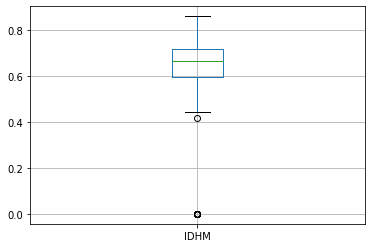

In [10]:
df_brazil.boxplot(column=['IDHM'])

In [11]:
df_brazil.loc[(df_brazil['IDHM'] < 0.5)][['CITY','STATE','IDHM']]

,CITY,STATE,IDHM
37,Afuá,PA,0.489
149,Amajari,RR,0.484
179,Anajás,PA,0.484
378,Assunção Do Piauí,PI,0.499
383,Atalaia Do Norte,AM,0.450
419,Bagre,PA,0.471
436,Balneário Rincão,SC,0.000
586,Betânia Do Piauí,PI,0.489
809,Cachoeira Do Piriá,PA,0.473
1159,Caxingó,PI,0.488


In [13]:
df_brazil.loc[(df_brazil['IDHM'] ==  1) | (df_brazil['IDHM'] > 0.6)][['CITY','STATE','IDHM']]

,CITY,STATE,IDHM
0,Abadia De Goiás,GO,0.708
1,Abadia Dos Dourados,MG,0.689
2,Abadiânia,GO,0.689
3,Abaetetuba,PA,0.628
4,Abaeté,MG,0.698
...,...,...,...
5571,Álvares Machado,SP,0.758
5572,Álvaro De Carvalho,SP,0.688
5573,Áurea,RS,0.707
5574,Ângulo,PR,0.721


In [3]:
# Criando os dataframes por região

nordeste = df_brazil.loc[(df_brazil['STATE'] == 'PE') | (df_brazil['STATE'] == 'MA') | (df_brazil['STATE'] == 'RN') | (df_brazil['STATE'] == 'BA') | (df_brazil['STATE'] == 'CE') | (df_brazil['STATE'] == 'AL') | (df_brazil['STATE'] == 'PI') | (df_brazil['STATE'] == 'PB') | (df_brazil['STATE'] == 'SE')]
norte =  df_brazil.loc[(df_brazil['STATE'] == 'AC') | (df_brazil['STATE'] == 'AP') | (df_brazil['STATE'] == 'AM') | (df_brazil['STATE'] == 'PA') | (df_brazil['STATE'] == 'RO') | (df_brazil['STATE'] == 'RR') | (df_brazil['STATE'] == 'TO')]
sul = df_brazil.loc[(df_brazil['STATE'] == 'PR') | (df_brazil['STATE'] == 'RS') | (df_brazil['STATE'] == 'SC')]
centroOeste =  df_brazil.loc[(df_brazil['STATE'] == 'DF') | (df_brazil['STATE'] == 'GO') | (df_brazil['STATE'] == 'MT') | (df_brazil['STATE'] == 'MS')]
sudeste = df_brazil.loc[(df_brazil['STATE'] == 'ES') | (df_brazil['STATE'] == 'MG') | (df_brazil['STATE'] == 'SP') | (df_brazil['STATE'] == 'RJ')]
# Verificação dos estados 
checknordeste = ['PE','BA', 'MA','PI','CE','RN','PB','AL','SE']
checknorte = ['AC','AP', 'AM','PA','RO','RR','TO']
checksul = ['PR','RS', 'SC']
checkcentroOeste = ['DF','GO', 'MT','MS']
checksudeste = ['ES','MG', 'SP','RJ']
# Verificação das cidades por estado
cidadesNordeste = df_brazil["STATE"].isin(checknordeste)
cidadesNorte = df_brazil["STATE"].isin(checknorte)
cidadesSul = df_brazil["STATE"].isin(checksul)
cidadesCentroOeste = df_brazil["STATE"].isin(checkcentroOeste)
cidadesSudeste = df_brazil["STATE"].isin(checksudeste)

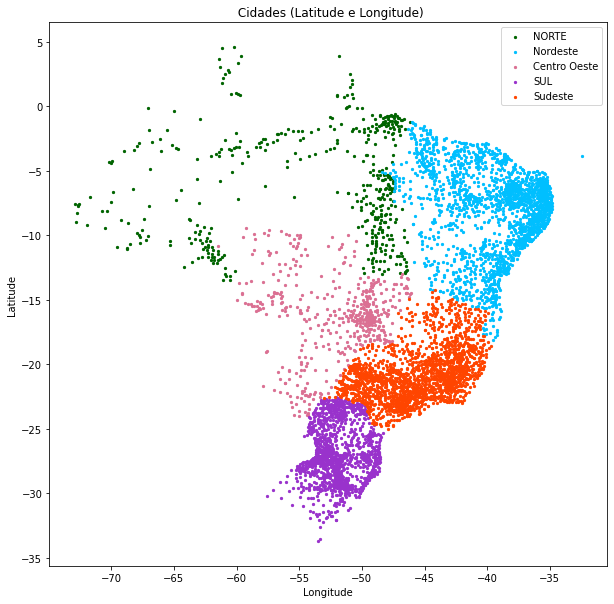

In [4]:
# Mapa do Brasil 

long= df_brazil["LONG"] !=0
lat = df_brazil["LAT"] !=0 
#cap = df_brazil.loc[df_brazil['CAPITAL'] == 1 & df_brazil["STATE"].isin(nordeste) ]

#cidadesNordeste = nordeste["STATE"].isin(checknordeste)
## use the scatter function
plt.figure(figsize=(10,10))
plt.title(" Cidades (Latitude e Longitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
#plt.scatter(df_brazil[long&lat&cap]["LONG"], df_brazil[long&lat&cap]["LAT"], s=50, alpha=1, label='Capital city', c ='#000000')
plt.scatter(df_brazil[long&lat&cidadesNorte]["LONG"], df_brazil[long&lat&cidadesNorte]["LAT"], s=5, alpha=1, label='NORTE', c ='#006400')
plt.scatter(df_brazil[long&lat&cidadesNordeste]["LONG"], df_brazil[long&lat&cidadesNordeste]["LAT"], s=5, alpha=1, label='Nordeste', c ='#00BFFF')
plt.scatter(df_brazil[long&lat&cidadesCentroOeste]["LONG"], df_brazil[long&lat&cidadesCentroOeste]["LAT"], s=5, alpha=1, label='Centro Oeste', c ='#DB7093')
plt.scatter(df_brazil[long&lat&cidadesSul]["LONG"], df_brazil[long&lat&cidadesSul]["LAT"], s=5, alpha=1, label='SUL', c ='#9932CC')
plt.scatter(df_brazil[long&lat&cidadesSudeste]["LONG"], df_brazil[long&lat&cidadesSudeste]["LAT"], s=5, alpha=1, label='Sudeste', c ='#FF4500')
#plt.scatter(df_brazil[long&lat&~cidadesNordeste]["LONG"], df_brazil[long&lat&~cidadesNordeste]["LAT"], s=1, alpha=1, c = '#4b0082')
plt.legend()
plt.show()

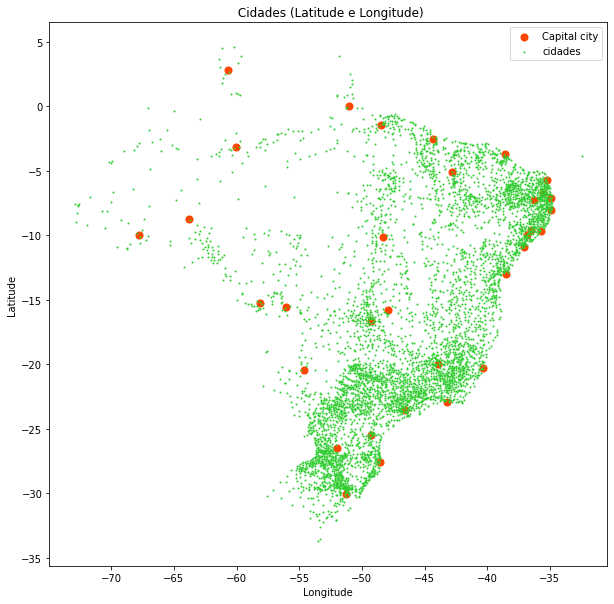

In [5]:
# Mapa do Brasil Capitais

long= df_brazil["LONG"] != 0
lat = df_brazil["LAT"] !=0 
cap = df_brazil['CAPITAL'] ==1
 
## use the scatter function
plt.figure(figsize=(10,10))
plt.title(" Cidades (Latitude e Longitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(df_brazil[long&lat&cap]["LONG"], df_brazil[long&lat&cap]["LAT"], s=50, alpha=1, label='Capital city', c ='#ff4500')
plt.scatter(df_brazil[long&lat&~cap]["LONG"], df_brazil[long&lat&~cap]["LAT"], s=1, alpha=1, label='cidades', c = '#32cd32')
plt.legend()
plt.show()

# **Índice de Desenvolvimento Humano** 

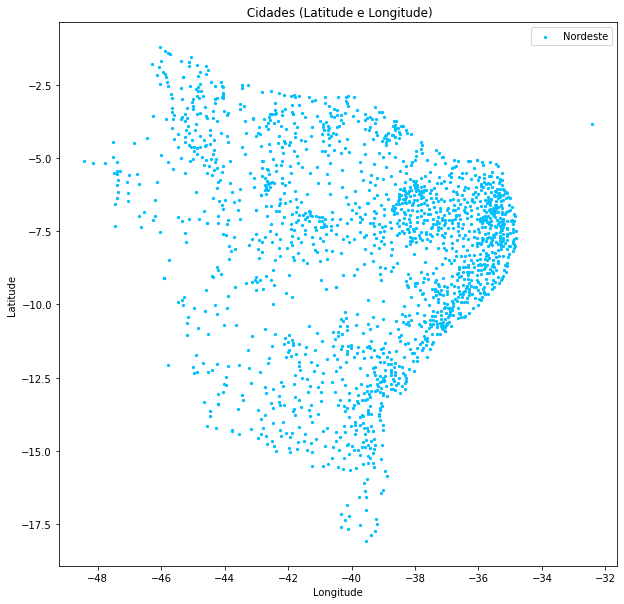

In [14]:
# Mapa do Nordeste

long= df_brazil["LONG"] !=0
lat = df_brazil["LAT"] !=0 
## use the scatter function
plt.figure(figsize=(10,10))
plt.title(" Cidades (Latitude e Longitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(df_brazil[long&lat&cidadesNordeste]["LONG"], df_brazil[long&lat&cidadesNordeste]["LAT"], s=5, alpha=1, label='Nordeste', c ='#00BFFF')
plt.legend()
plt.show()

<AxesSubplot:>

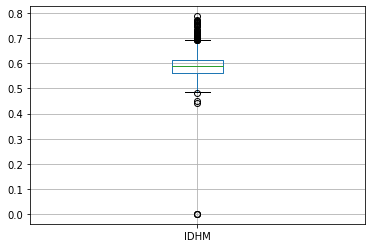

In [15]:
nordeste.boxplot(column=['IDHM'])

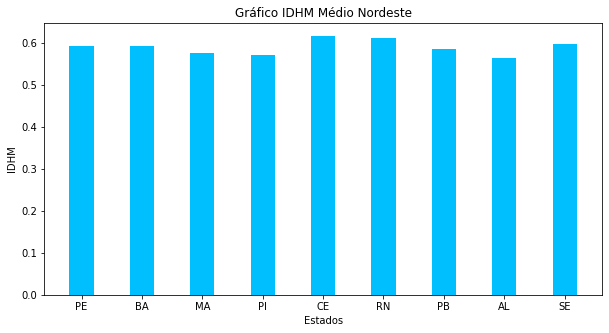

In [16]:
# Criando lista
dados =  {'PE':nordeste[nordeste['STATE'] == 'PE'].IDHM.mean() ,'BA':nordeste[nordeste['STATE'] == 'BA'].IDHM.mean(), 'MA':nordeste[nordeste['STATE'] == 'MA'].IDHM.mean(),'PI':nordeste[nordeste['STATE'] == 'PI'].IDHM.mean(),'CE':nordeste[nordeste['STATE'] == 'CE'].IDHM.mean(),'RN':nordeste[nordeste['STATE'] == 'RN'].IDHM.mean(),'PB':nordeste[nordeste['STATE'] == 'PB'].IDHM.mean(),'AL':nordeste[nordeste['STATE'] == 'AL'].IDHM.mean(),'SE':nordeste[nordeste['STATE'] == 'SE'].IDHM.mean()}
Estados = list(dados.keys())
MediaIDHM = list(dados.values())
fig = plt.figure(figsize = (10, 5))

# criando Gráfico
plt.bar(Estados, MediaIDHM, color ='#00BFFF',width = 0.4)
plt.xlabel("Estados")
plt.ylabel("IDHM")
plt.title("Gráfico IDHM Médio Nordeste")
plt.show()

# **Pernambuco**

In [17]:
nordeste.loc[(nordeste['STATE'] == "PE")].head()

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
13,Abreu E Lima,PE,0,94429,94407,22,28182,25944,2238,81482,...,3,155632735,460626103,14579,10122,0,0,0,0,1
32,Afogados Da Ingazeira,PE,0,35088,35088,0,10879,8667,2212,27335,...,2,95355383,251149663,5737,10461,0,0,0,0,1
36,Afrânio,PE,0,17586,17586,0,4744,1681,3063,5841,...,1,0,44765064,809,3677,0,0,0,0,4
38,Agrestina,PE,0,22679,22679,0,6882,5209,1673,16935,...,1,0,33677594,2825,2929,0,0,0,0,3
57,Alagoinha,PE,0,13759,13753,6,4108,2410,1698,7769,...,1,0,25113414,1210,1153,0,0,0,0,1


In [18]:
#Quantidades de cidades de Pernambuco
nordeste.loc[(nordeste['STATE'] == "PE")]['CITY'].count()

186

In [19]:
#Quantidade de Habitantes
nordeste.loc[(nordeste['STATE'] == "PE")]['IBGE_RES_POP'].sum()

8796448

<AxesSubplot:>

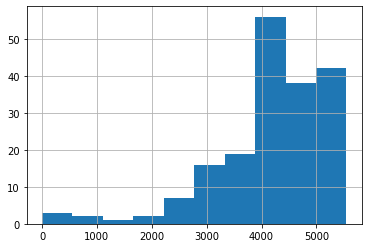

In [20]:
#Rankim IDHM PE

nordeste.loc[(nordeste['STATE'] == "PE")]['IDHM Ranking 2010'].hist()

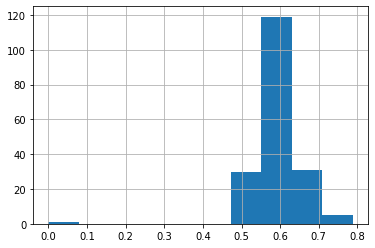

In [21]:
histPE=nordeste[nordeste['STATE'] == "PE"]['IDHM'].hist()

In [22]:
nordeste.loc[(nordeste['IDHM'] < 0.5) & (nordeste['STATE'] == "PE")][['CITY','STATE','IDHM']]

,CITY,STATE,IDHM
2848,Manari,PE,0.487
4746,São Caetano,PE,0.000


# **----------------------------------------------------------------------------** 

# **Leandro aqui**

In [7]:
df_brazil.describe()

,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
count,5578.000000,5.578000e+03,5.578000e+03,5578.000000,5.578000e+03,5.578000e+03,5578.000000,5.578000e+03,5578.000000,5578.000000,...,5578.000000,5.578000e+03,5.578000e+03,5.578000e+03,5.578000e+03,5578.000000,5578.000000,5578.000000,5578.000000,5578.000000
mean,0.005916,3.422313e+04,3.414573e+04,77.404625,1.028313e+04,8.842319e+03,1440.807458,2.755270e+04,382.669236,1542.089100,...,0.947293,5.500436e+09,3.598663e+09,9.839788e+03,4.869557e+03,5.739871,0.022409,0.127465,0.037827,2.035497
std,0.076695,2.028829e+05,2.012627e+05,1793.789719,6.469199e+04,6.428575e+04,1690.483808,1.857468e+05,2324.175869,9242.622881,...,1.069279,2.775752e+11,1.164327e+11,9.175728e+04,2.091673e+04,55.301718,0.148024,2.151446,0.533446,4.378558
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.217000e+03,5.214000e+03,0.000000,1.565250e+03,8.700000e+02,469.250000,2.784250e+03,38.000000,158.000000,...,0.000000,0.000000e+00,0.000000e+00,5.990000e+02,5.880000e+02,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.092650e+04,1.091600e+04,0.000000,3.167000e+03,1.839500e+03,916.000000,6.156000e+03,92.000000,376.000000,...,1.000000,0.000000e+00,2.319925e+07,1.431500e+03,1.280000e+03,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,2.340900e+04,2.338000e+04,10.000000,6.722500e+03,4.618750e+03,1811.750000,1.529875e+04,232.000000,949.750000,...,2.000000,4.774853e+07,1.991191e+08,4.084000e+03,3.292750e+03,1.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.125350e+07,1.113378e+07,119727.000000,3.576148e+06,3.548433e+06,33809.000000,1.046364e+07,129464.000000,514794.000000,...,8.000000,1.947077e+13,8.016164e+12,5.740995e+06,1.134570e+06,3236.000000,1.000000,130.000000,26.000000,225.000000
